# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [12]:
# Unduh Dataset MNIST
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk
from skimage.feature import hog
from skimage import data, exposure
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml('mnist_784')

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [14]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Jumlah data untuk label 0: 6903
Jumlah data untuk label 1: 7877
Jumlah data untuk label 2: 6990
Jumlah data untuk label 3: 7141
Jumlah data untuk label 4: 6824
Jumlah data untuk label 5: 6313
Jumlah data untuk label 6: 6876
Jumlah data untuk label 7: 7293
Jumlah data untuk label 8: 6825
Jumlah data untuk label 9: 6958
Dataset MNIST seimbang secara data.


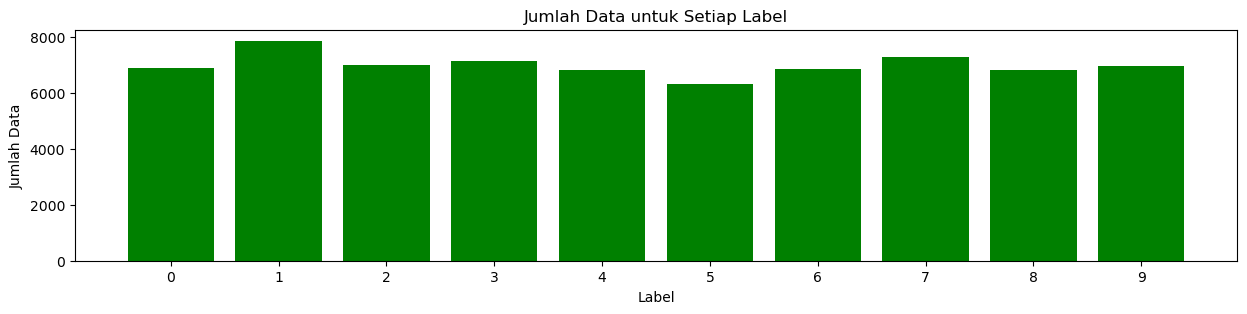

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung jumlah data setiap label
y = mnist.target.astype(np.int64)
label_counts = np.bincount(y)

for i, count in enumerate(label_counts):
    print(f"Jumlah data untuk label {i}: {count}")

# Menampilkan apakah ada ketidakseimbangan data
is_imbalanced = len(set(label_counts)) == 1
if is_imbalanced:
    print("Dataset MNIST memiliki ketidakseimbangan data.")
else:
    print("Dataset MNIST seimbang secara data.")

    
#gunakan plt.imshow untuk menampilkan jumlah data untuk setiap label
plt.figure(figsize=(15, 3))
plt.bar(range(10), label_counts, color='green')
plt.xticks(range(10))
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.title("Jumlah Data untuk Setiap Label")
plt.show()

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

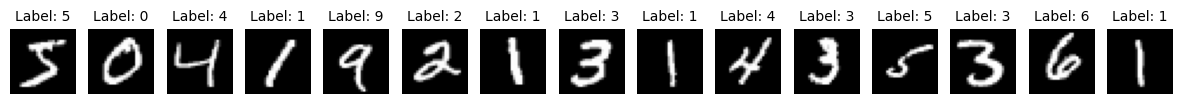

In [16]:
# Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya
X = mnist.data.to_numpy()
y = mnist.target.astype(np.int64)

plt.figure(figsize=(15, 3))

# Menampilkan 15 citra pertama dengan labelnya
for index in range(15):
    image = X[index].reshape(28, 28)
    label = y[index]
    
    plt.subplot(1, 15, index + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Label: %i' % label, fontsize=10)
    plt.axis('off')

plt.show()



3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.


Hasil ekstraksi fitur menggunakan filter Gaussian:
Ukuran data training: (60000, 784)
Ukuran data testing: (10000, 784)


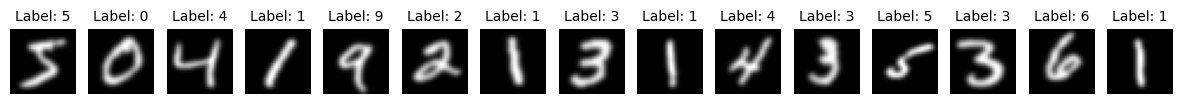

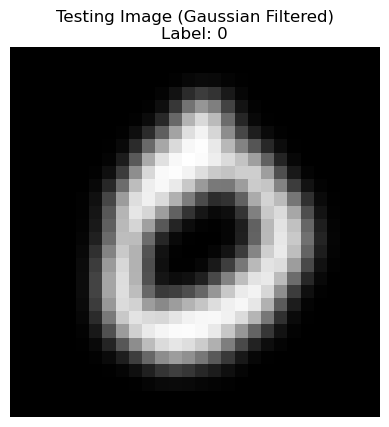

In [17]:
import numpy as np
from scipy.ndimage import gaussian_filter
%pip install tensorflow
from tensorflow.keras.datasets import mnist

# Unduh dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Definisikan parameter filter Gaussian
sigma = 1.0  # Nilai sigma untuk filter Gaussian, sesuaikan sesuai kebutuhan

# Fungsi untuk mengaplikasikan filter Gaussian ke dataset
def apply_gaussian_filter(data, sigma):
    filtered_data = np.zeros_like(data)
    for i in range(len(data)):
        filtered_data[i] = gaussian_filter(data[i], sigma=sigma)
    return filtered_data

# Terapkan filter Gaussian ke dataset MNIST
X_train_filtered = apply_gaussian_filter(X_train, sigma)
X_test_filtered = apply_gaussian_filter(X_test, sigma)

# Reshape gambar menjadi vektor
X_train_filtered = X_train_filtered.reshape(X_train_filtered.shape[0], -1)
X_test_filtered = X_test_filtered.reshape(X_test_filtered.shape[0], -1)

# Hasil ekstraksi fitur dengan filter Gaussian
print("Hasil ekstraksi fitur menggunakan filter Gaussian:")
print("Ukuran data training:", X_train_filtered.shape)
print("Ukuran data testing:", X_test_filtered.shape)


#gunakan plt untuk menampilkan hasil ekstraksi fitur menggunakan filter Gaussian
plt.figure(figsize=(15, 3))

# Menampilkan 15 citra pertama dengan labelnya
for index in range(15):
    image = X_train_filtered[index].reshape(28, 28)
    label = y_train[index]
    
    plt.subplot(1, 15, index + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Label: %i' % label, fontsize=10)
    plt.axis('off')

plt.show()

# Print image testing for Gaussian MNIST dataset
# Let's print an example image from the testing set with the Gaussian filter applied
index_to_display = 3  # Change this to the index of the image you want to display
test_image_filtered = X_test_filtered[index_to_display].reshape(28, 28)
test_label = y_test[index_to_display]

plt.figure()
plt.imshow(test_image_filtered, cmap='gray')
plt.title('Testing Image (Gaussian Filtered)\nLabel: %i' % test_label, fontsize=12)
plt.axis('off')
plt.show()



Hasil ekstraksi fitur menggunakan filter Gaussian:
Ukuran data training: (60000, 784)
Ukuran data testing: (10000, 784)


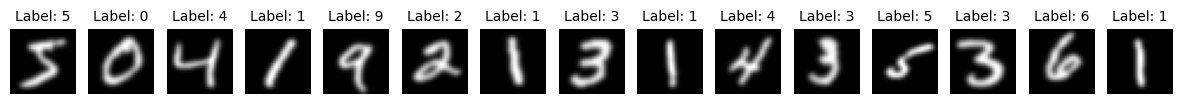

Ukuran data fitur HOG (pelatihan): (60000, 0)
Ukuran data fitur HOG (pengujian): (10000, 0)


ValueError: cannot reshape array of size 0 into shape (7,7)

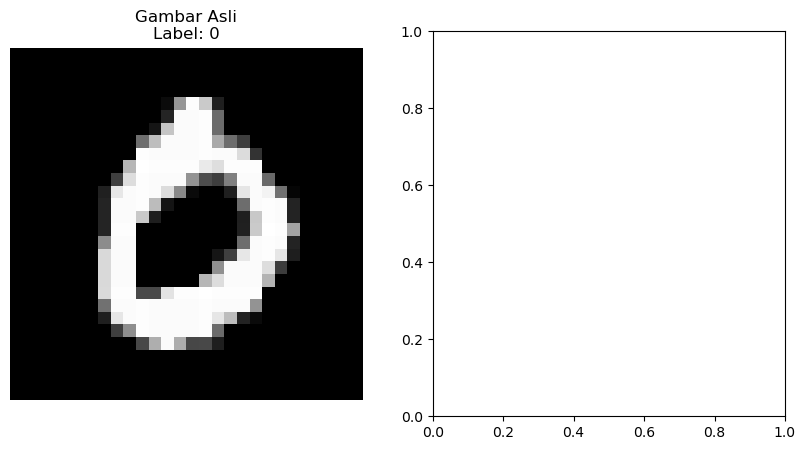

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.feature import hog
from skimage import exposure
%pip install tensorflow
from tensorflow.keras.datasets import mnist

# Unduh dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Definisikan parameter filter Gaussian
sigma = 1.0  # Nilai sigma untuk filter Gaussian, sesuaikan sesuai kebutuhan

# Fungsi untuk mengaplikasikan filter Gaussian ke dataset
def apply_gaussian_filter(data, sigma):
    filtered_data = np.zeros_like(data)
    for i in range(len(data)):
        filtered_data[i] = gaussian_filter(data[i], sigma=sigma)
    return filtered_data

# Terapkan filter Gaussian ke dataset MNIST
X_train_filtered = apply_gaussian_filter(X_train, sigma)
X_test_filtered = apply_gaussian_filter(X_test, sigma)

# Reshape gambar menjadi vektor
X_train_filtered = X_train_filtered.reshape(X_train_filtered.shape[0], -1)
X_test_filtered = X_test_filtered.reshape(X_test_filtered.shape[0], -1)

# Hasil ekstraksi fitur dengan filter Gaussian
print("Hasil ekstraksi fitur menggunakan filter Gaussian:")
print("Ukuran data training:", X_train_filtered.shape)
print("Ukuran data testing:", X_test_filtered.shape)

#gunakan plt untuk menampilkan hasil ekstraksi fitur menggunakan filter Gaussian
plt.figure(figsize=(15, 3))

# Menampilkan 15 citra pertama dengan labelnya
for index in range(15):
    image = X_train_filtered[index].reshape(28, 28)
    label = y_train[index]
    
    plt.subplot(1, 15, index + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Label: %i' % label, fontsize=10)
    plt.axis('off')

plt.show()

# Ekstraksi fitur HOG dari gambar yang difilter
def extract_hog_features(data):
    hog_features = []
    for image in data:
        features = hog(image, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

# Extract HOG features from the filtered images
X_train_hog = extract_hog_features(X_train_filtered)
X_test_hog = extract_hog_features(X_test_filtered)

# Print the size of the HOG feature data
print("Ukuran data fitur HOG (pelatihan):", X_train_hog.shape)
print("Ukuran data fitur HOG (pengujian):", X_test_hog.shape)

# Tampilkan gambar asli dan HOG features
index_to_display = 3  # Ganti ini menjadi indeks gambar yang ingin Anda tampilkan
test_image_original = X_test[index_to_display].reshape(28, 28)
test_image_hog = X_test_hog[index_to_display].reshape(-1)  # Sesuaikan ukuran HOG

plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(test_image_original, cmap='gray')
plt.title('Gambar Asli\nLabel: %i' % y_test[index_to_display], fontsize=12)
plt.axis('off')

# HOG Features
plt.subplot(1, 2, 2)
plt.imshow(test_image_hog.reshape(7, 7), cmap='gray')  # Reshape agar sesuai dengan HOG ukuran
plt.title('HOG Features', fontsize=12)
plt.axis('off')

plt.show()


4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [ ]:
#Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

# Bagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape gambar menjadi vektor
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Bagi dataset sesuai dengan rasio yang diinginkan
# 70% training, 30% testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# 80% training, 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 90% training, 10% testing
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Cetak ukuran dataset yang dihasilkan
print("70:30 Split - Training:", X_train_70.shape, "Testing:", X_test_30.shape)
print("80:20 Split - Training:", X_train_80.shape, "Testing:", X_test_20.shape)
print("90:10 Split - Training:", X_train_90.shape, "Testing:", X_test_10.shape)




70:30 Split - Training: (34300, 784) Testing: (14700, 784)
80:20 Split - Training: (39200, 784) Testing: (9800, 784)
90:10 Split - Training: (44100, 784) Testing: (4900, 784)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Inisialisasi model SVM
svm = SVC()

# Parameter yang akan di-tune
param_grid = {
    'C': [1, 10],  # Parameter C yang mengontrol trade-off antara margin dan error
    'kernel': ['linear', 'rbf', 'poly'],  # Jenis kernel yang akan diuji
}

# Inisialisasi GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svm, param_grid, cv=3)

# Latih model SVM dengan data pelatihan
grid_search.fit(X_train_filtered, y_train)

# Mendapatkan parameter terbaik dari GridSearchCV
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

# Prediksi label kelas untuk data pengujian
y_pred_svm = grid_search.predict(X_test_filtered)

# Hitung akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Akurasi SVM:", accuracy_svm)


ValueError: Found input variables with inconsistent numbers of samples: [60000, 49000]